## 准备数据

In [28]:
import numpy as np

def true_function(x):
    return np.sin(x) + 0.1 * np.random.normal(size=x.shape)
    # return np.exp(-(x - 0.1)**2 / (2 * 0.1**2)) / (0.1 * np.sqrt(2 * np.pi))    

class TwoLayerReLUModel:
    def __init__(self, input_size, hidden_units, output_size):
        self.W1 = np.random.randn(input_size, hidden_units)
        self.b1 = np.zeros((1, hidden_units))
        self.W2 = np.random.randn(hidden_units, output_size)
        self.b2 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, x):
        self.x = x
        self.h1 = self.relu(np.dot(x, self.W1) + self.b1)
        self.output = np.dot(self.h1, self.W2) + self.b2
        return self.output

    def backward(self, grad_y, learning_rate):
        grad_output = grad_y
        grad_W2 = np.dot(self.h1.T, grad_output)
        grad_b2 = np.sum(grad_output, axis=0, keepdims=True)
        grad_h1 = np.dot(grad_output, self.W2.T)
        grad_h1[self.h1 <= 0] = 0
        grad_W1 = np.dot(self.x.T, grad_h1)
        grad_b1 = np.sum(grad_h1, axis=0, keepdims=True)

        # 参数更新
        self.W2 -= learning_rate * grad_W2
        self.b2 -= learning_rate * grad_b2
        self.W1 -= learning_rate * grad_W1
        self.b1 -= learning_rate * grad_b1

In [29]:
# 创建两层ReLU网络模型实例
input_size = 1
hidden_units = 10  # 可调整隐藏层神经元数量
output_size = 1
learning_rate = 0.01

two_layer_model = TwoLayerReLUModel(input_size, hidden_units, output_size)

# 执行训练
epochs = 10000
for epoch in range(epochs):
    # 生成随机训练数据
    x_train = np.random.uniform(-2*np.pi, 2*np.pi, 100).reshape(-1, 1)
    y_train = true_function(x_train)

    # 前向传播
    predictions = two_layer_model.forward(x_train)

    # 计算损失（均方误差）
    loss = np.mean((predictions - y_train)**2)

    # 反向传播
    grad_y = 2 * (predictions - y_train) / len(y_train)
    two_layer_model.backward(grad_y, learning_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 28.088396136442544
Epoch 100, Loss: 0.2635428869339654
Epoch 200, Loss: 0.1575926750168559
Epoch 300, Loss: 0.15293248993721145
Epoch 400, Loss: 0.14730901110251693
Epoch 500, Loss: 0.170511914780683
Epoch 600, Loss: 0.19702584064519427
Epoch 700, Loss: 0.1308323830645851
Epoch 800, Loss: 0.14100602348224367
Epoch 900, Loss: 0.16738214355643366
Epoch 1000, Loss: 0.1530915739396096
Epoch 1100, Loss: 0.1451166423033515
Epoch 1200, Loss: 0.14232671828419324
Epoch 1300, Loss: 0.17437227989572016
Epoch 1400, Loss: 0.14467316324109278
Epoch 1500, Loss: 0.15157610258284218
Epoch 1600, Loss: 0.15096912277329094
Epoch 1700, Loss: 0.14397248346610544
Epoch 1800, Loss: 0.19832153783342896
Epoch 1900, Loss: 0.1585198945366985
Epoch 2000, Loss: 0.1506481746683771
Epoch 2100, Loss: 0.1574416927252143
Epoch 2200, Loss: 0.20972688105544127
Epoch 2300, Loss: 0.18407651392941116
Epoch 2400, Loss: 0.19342013955919185
Epoch 2500, Loss: 0.1791506809163158
Epoch 2600, Loss: 0.1699923910834734

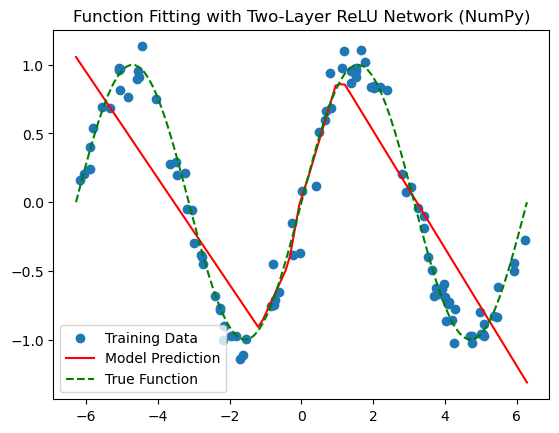

In [30]:
# 在测试集上进行预测
x_test = np.linspace(-2*np.pi, 2*np.pi, 100).reshape(-1, 1)
predictions_test = two_layer_model.forward(x_test)

# 绘制结果
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, label='Training Data')
plt.plot(x_test, predictions_test, label='Model Prediction', color='r')
plt.plot(x_test, np.sin(x_test), label='True Function', linestyle='--', color='g')
plt.legend()
plt.title('Function Fitting with Two-Layer ReLU Network (NumPy)')
plt.show()